In [ ]:
# Start writing code here...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multinomial, dirichlet

In [4]:
df = pd.read_excel('Primera_vuelta_2021.xlsx')
datos2021 = df.to_numpy()[:, 3:7]

In [ ]:
datos2021

array([[  96,   80,   32,   48],
       [ 115,   51,   85,  178],
       [ 548,  737,  357,  580],
       [ 209,  316,  178,  352],
       [ 117,  137,   48,  234],
       [  95,   65,   57,  121],
       [ 143,  215,  143,  215],
       [ 166,  300,  236,  298],
       [ 192,  480,  384,  288],
       [  56,  175,  210,   84],
       [1214, 2971, 3305, 1054],
       [ 269,  707,  827,  381],
       [ 302,  668,  523,  242],
       [ 357,  463,  612,  379],
       [ 251,  587,  737,  357],
       [ 241,  425,  592,  249],
       [ 157,  307,  427,  166],
       [ 222,  294,  438,  169],
       [ 500,  442,  768,  343],
       [1587, 1183, 2142,  948],
       [ 618,  271,  790,  466],
       [ 576,  169,  575,  260],
       [2265,  730, 2066,  951],
       [7741, 2540, 6373, 2763]])

In [ ]:
from scipy.stats import dirichlet

y = datos2021[0]
p = np.full(4, 1/4)
alpha = 1000*p+y
dirichlet.rvs(alpha)
    

array([[0.27922469, 0.27150239, 0.20262768, 0.24664524]])

In [36]:
def modelo2021(data, N):
    post = lambda p, alpha: dirichlet.logpdf(p, alpha)
    days = np.size(data, axis=0)
    muestra = np.zeros((N, days+1, 4))
    prediccion = np.zeros((N, 4))
    prior = np.full(4, 1/4)
    d = 0.1
    c = np.zeros(days)
    for i in range(N):
        muestra[i, 0] = prior
        for day in range(days):
            p = muestra[i, day]
            y = data[day]
            p_prueba = np.random.uniform(np.maximum(p-d,0), p+d, size=4)
            p_prueba = p_prueba/p_prueba.sum()
            alpha = 100 * p + y
            if post(p_prueba, alpha) - post(p, alpha) > np.log(np.random.uniform()):
                muestra[i, day+1] = p_prueba
                c[day] += 1
            else:
                muestra[i, day+1] = p
        prediccion[i] = muestra[i, -1]
    return muestra, prediccion, c

In [ ]:
p = np.array([0.25,0.25,0.25,0.25])

d = 0.5
np.maximum(p-d,0)

array([0., 0., 0., 0.])

In [ ]:
'''
def modelo2021(data, N):
    post = lambda y, p: np.prod()
    weeks = np.size(data, axis=0)
    muestra = np.zeros((N, weeks+1, 4))
    prediccion = np.zeros((N, 4))
    prior = np.full(4, 0.25)
    d = 0.5
    for week in range(weeks):
        


    for i in range(N):
        prob = prior
        for week in range(weeks):
            y = data[week]
            alpha = 1000 * prob + y
            prob = dirichlet.rvs(alpha)
            muestra[i, week] = multinomial.rvs(prob)
        prediccion[i] = muestra[i, -1]
    return muestra, prediccion
    '''

In [ ]:
p = np.array([0.4,0.1,0.35,0.15])
p = p/p.sum()
a = np.array([0.25,0.25,0.25,0.25])
y = np.array([96,80,32,48])
x = np.power(p,a*0.001+y-1)
x.prod()


2.1748448547226404e-170

In [37]:
np.random.seed(756)
muestra, prediccion, c = modelo2021(datos2021, 10_000)
weeks = np.size(datos2021, 0)
for i in range(weeks):
    print('aceptados semana {}: {:%}'.format(i+1, c[i]/10000))

aceptados semana 1: 35.990000%
aceptados semana 2: 39.070000%
aceptados semana 3: 30.370000%
aceptados semana 4: 29.280000%
aceptados semana 5: 38.190000%
aceptados semana 6: 27.520000%
aceptados semana 7: 25.010000%
aceptados semana 8: 28.170000%
aceptados semana 9: 35.410000%
aceptados semana 10: 39.780000%
aceptados semana 11: 39.330000%
aceptados semana 12: 37.070000%
aceptados semana 13: 33.090000%
aceptados semana 14: 29.660000%
aceptados semana 15: 33.260000%
aceptados semana 16: 30.680000%
aceptados semana 17: 29.910000%
aceptados semana 18: 29.270000%
aceptados semana 19: 30.570000%
aceptados semana 20: 31.010000%
aceptados semana 21: 34.460000%
aceptados semana 22: 36.940000%
aceptados semana 23: 36.850000%
aceptados semana 24: 35.890000%


In [ ]:
muestra

array([[[0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        ...,
        [0.33496462, 0.11929545, 0.29650153, 0.2492384 ],
        [0.33496462, 0.11929545, 0.29650153, 0.2492384 ],
        [0.33496462, 0.11929545, 0.29650153, 0.2492384 ]],

       [[0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        ...,
        [0.42478316, 0.10883733, 0.28698257, 0.17939694],
        [0.42478316, 0.10883733, 0.28698257, 0.17939694],
        [0.42478316, 0.10883733, 0.28698257, 0.17939694]],

       [[0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        ...,
        [0.19871137, 0.34791756, 0.25087307, 0.202498  ],
        [0.19871137, 0.347917

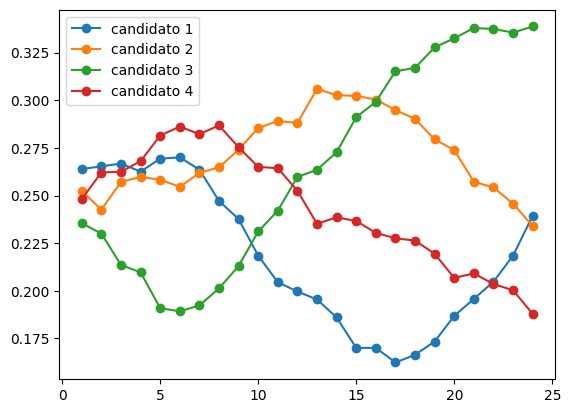

In [38]:
x = muestra[2000::200].mean(0)
weeks = int(np.size(x, axis=0))
for i in range(4):
    plt.plot(range(1, weeks), x[1:,i], 'o-', label= 'candidato {}'.format(i+1))
plt.legend()

In [39]:
pred = prediccion.mean(0)
print('Kast: {:%}'.format(pred[0]))
print('Sichel: {:%}'.format(pred[1]))
print('Boric: {:%}'.format(pred[2]))
print('Provoste: {:%}'.format(pred[3]))

Kast: 25.833310%
Sichel: 22.309961%
Boric: 32.544960%
Provoste: 19.311769%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d24ecb2b-b17d-41bb-82ac-38080033d82c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>